In [23]:
import nltk
from nltk.corpus import movie_reviews

# Descargar el corpus si no está
nltk.download('movie_reviews')

# Ver cuántos documentos hay
document_ids = movie_reviews.fileids()
print(f"Total de documentos: {len(document_ids)}")

# Mostrar un ejemplo
print("\nPrimeras palabras del primer documento:")
print(movie_reviews.words(document_ids[0])[:10])


Total de documentos: 2000

Primeras palabras del primer documento:
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party']


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
import string

# Preprocesar todos los documentos: minúsculas, solo palabras
def preprocess(doc_id):
    words = movie_reviews.words(doc_id)
    tokens = [w.lower() for w in words if w.isalpha()]
    return tokens

# Aplicar a todos los documentos
processed_corpus = [preprocess(doc_id) for doc_id in movie_reviews.fileids()]

# Ver ejemplo
print(f"Tokens del primer documento:\n{processed_corpus[0][:10]}")

Tokens del primer documento:
['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink', 'and', 'then', 'drive', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', 'and', 'has', 'nightmares', 'what', 's', 'the', 'deal', 'watch', 'the', 'movie', 'and', 'sorta', 'find', 'out', 'critique', 'a', 'mind']


In [ ]:
from gensim.models import Word2Vec

# Entrenar modelo Word2Vec
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=2, workers=4, sg=1)

# Verificar vector de ejemplo
print(model.wv['movie']) 


[ 1.91721227e-02  1.26037866e-01  1.28730386e-01  2.55609572e-01
  1.21787421e-01 -4.86370891e-01 -3.00853979e-02  8.58027160e-01
 -2.63434708e-01 -5.71051007e-03  1.43485188e-01 -4.69842434e-01
 -1.43157870e-01  5.78736402e-02 -1.73265755e-01 -1.92737475e-03
 -6.74794465e-02 -3.91758140e-03 -1.41969934e-01 -7.74014831e-01
 -3.57145488e-01  1.91589743e-01  3.70300621e-01 -3.31526726e-01
  3.34612310e-01  2.06817001e-01 -1.66704372e-01 -3.49470109e-01
  3.32380503e-01 -3.88399243e-01 -3.14102210e-02 -2.04755992e-01
  2.49035373e-01 -2.86920309e-01 -1.84628263e-01  6.41129911e-01
  4.14930731e-01  2.55512387e-01  2.29203537e-01 -2.45438904e-01
 -8.13763514e-02 -1.18058771e-01 -4.47736718e-02  1.99470252e-01
  7.95323327e-02 -1.60237759e-01 -7.72597566e-02 -5.72836459e-01
  1.29650384e-01  4.91215810e-02  2.74294198e-01 -3.86690557e-01
 -1.46174371e-01 -4.82937187e-01  1.64299577e-01  5.80961257e-02
 -1.12487212e-01  4.79610324e-01  2.51883399e-02  1.10077567e-01
  3.03867698e-01 -7.13032

In [28]:
# Palabras más similares a 'movie'
print(model.wv.most_similar('movie', topn=5))

# Probar analogía: 'man' is to 'king' as 'woman' is to ?
print(model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))


[('film', 0.9127466678619385), ('turkey', 0.7659926414489746), ('analyze', 0.7452406883239746), ('celluloid', 0.7297824025154114), ('flick', 0.7283340692520142)]
[('hewitt', 0.6308860778808594)]


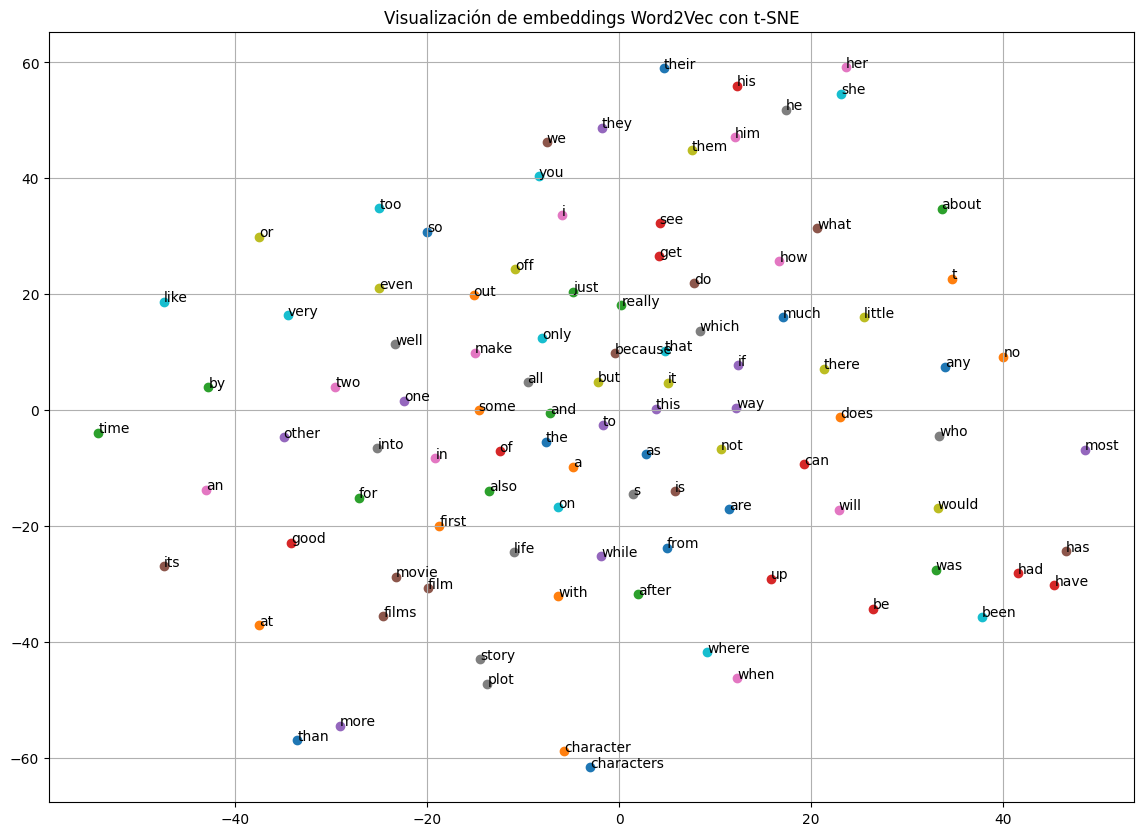

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Seleccionar palabras comunes
words = list(model.wv.index_to_key)[:100]

# Obtener vectores como array de numpy
word_vectors = np.array([model.wv[word] for word in words])

# Reducir a 2D con t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=15)
vectors_2d = tsne.fit_transform(word_vectors)

# Graficar
plt.figure(figsize=(14, 10))
for i, word in enumerate(words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))
plt.title("Visualización de embeddings Word2Vec con t-SNE")
plt.grid(True)
plt.show()


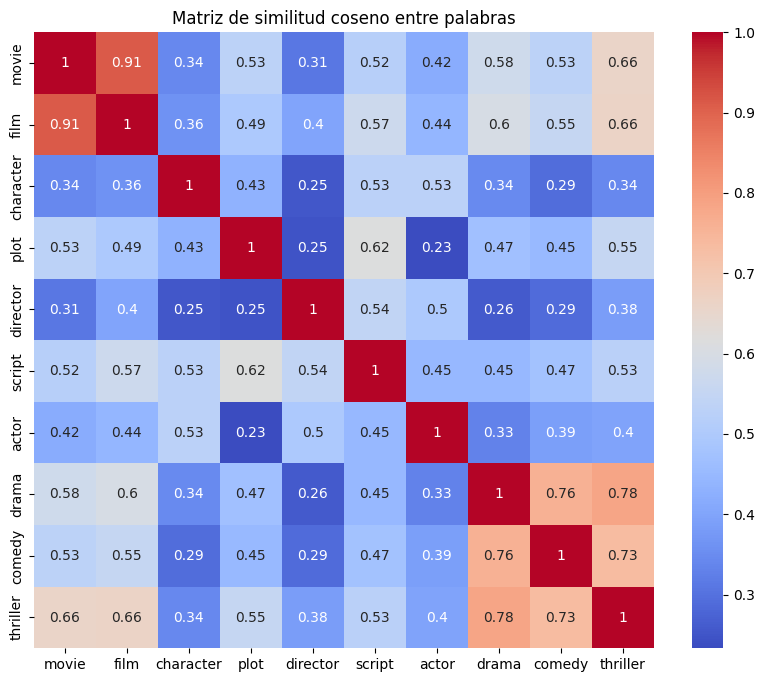

In [31]:
import seaborn as sns
import numpy as np

# Seleccionar palabras y obtener sus vectores
selected_words = ["movie", "film", "character", "plot", "director", "script", "actor", "drama", "comedy", "thriller"]
selected_vectors = [model.wv[word] for word in selected_words]

# Calcular matriz de similitud coseno
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(selected_vectors)

# Graficar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=selected_words, yticklabels=selected_words, annot=True, cmap="coolwarm")
plt.title("Matriz de similitud coseno entre palabras")
plt.show()
